# project 3- movies

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("movies.csv")#import data from file
print(data)
print(data.info())
print(data.describe())#This function help us to describe the arithamtic operation to understand the data

     rank   movie_id                     title  year   
0       1  tt0111161  The Shawshank Redemption  1994  \
1       2  tt0068646             The Godfather  1972   
2       3  tt0468569           The Dark Knight  2008   
3       4  tt0071562     The Godfather Part II  1974   
4       5  tt0050083              12 Angry Men  1957   
..    ...        ...                       ...   ...   
245   246  tt0071411               Dersu Uzala  1975   
246   247  tt1454029                  The Help  2011   
247   248  tt0103639                   Aladdin  1992   
248   249  tt0083987                    Gandhi  1982   
249   250  tt0099348        Dances with Wolves  1990   

                                     link imbd_votes  imbd_rating certificate   
0    https://www.imdb.com/title/tt0111161  2,711,075          9.3           R  \
1    https://www.imdb.com/title/tt0068646  1,882,829          9.2           R   
2    https://www.imdb.com/title/tt0468569  2,684,051          9.0       PG-13   
3  

In [162]:
#This function show the starting values of head of sheet
df = data.head(20)
print(df)

    rank   movie_id                                              title  year   
0      1  tt0111161                           The Shawshank Redemption  1994  \
1      2  tt0068646                                      The Godfather  1972   
2      3  tt0468569                                    The Dark Knight  2008   
3      4  tt0071562                              The Godfather Part II  1974   
4      5  tt0050083                                       12 Angry Men  1957   
5      6  tt0108052                                   Schindler's List  1993   
6      7  tt0167260      The Lord of the Rings: The Return of the King  2003   
7      8  tt0110912                                       Pulp Fiction  1994   
8      9  tt0120737  The Lord of the Rings: The Fellowship of the Ring  2001   
9     10  tt0060196                     The Good, the Bad and the Ugly  1966   
10    11  tt0109830                                       Forrest Gump  1994   
11    12  tt0137523                     

In [163]:
#This function help us to find the sum of null values
print(data.isnull().sum())

rank              0
movie_id          0
title             0
year              0
link              0
imbd_votes        0
imbd_rating       0
certificate       1
duration          0
genre             0
cast_id           0
cast_name         0
director_id       0
director_name     0
writer_id         0
writer_name       0
storyline         0
user_id           0
user_name         0
review_id         0
review_title      0
review_content    0
dtype: int64


In [164]:
#group by on the basis of movie_id to find genre group
gp=df.groupby("genre").agg({"movie_id":"count"})
print(gp)

                          movie_id
genre                             
Action,Adventure,Drama           3
Action,Adventure,Fantasy         1
Action,Adventure,Sci-Fi          1
Action,Crime,Drama               1
Action,Drama                     1
Action,Sci-Fi                    1
Adventure,Western                1
Biography,Crime,Drama            1
Biography,Drama,History          1
Crime,Drama                      4
Crime,Drama,Mystery              1
Drama                            3
Drama,Romance                    1


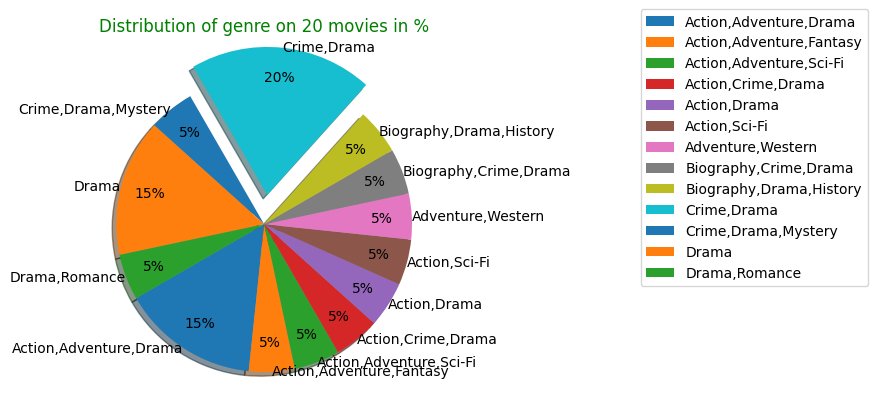

In [191]:
# plot a graph to show the distribution of genre in the top 250 movies 

exp=[0,0,0,0,0,0,0,0,0,0.2,0,0,0]
plt.pie(gp["movie_id"],labels=gp.index,autopct="%1.0f%%",labeldistance=1,pctdistance=0.8,shadow="true",
        startangle=210,counterclock="true",explode=exp)
plt.title("Distribution of genre on 20 movies in %",color="Green", loc = "center")
plt.legend(bbox_to_anchor = (1.5,1.1))

plt.show()


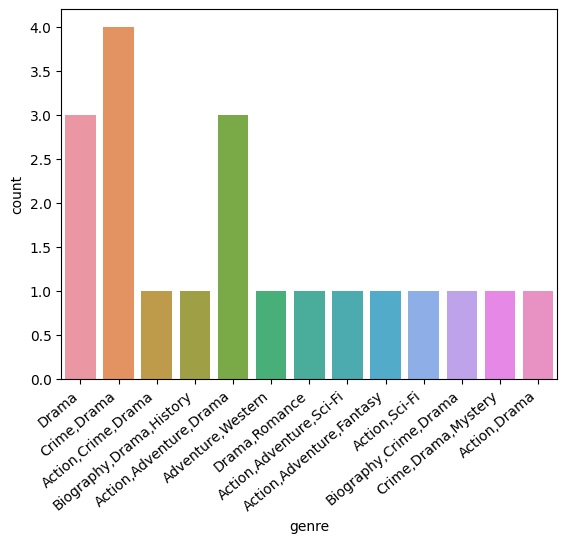

In [166]:
#Another method for finding count of "genre"

sns.countplot(data=pie, x= "genre")
plt.xticks(rotation=40,ha="right",)
plt.show()

In [175]:
#maximum number of votes of movies 

df["imbd_votes"]==df["imbd_votes"].str.replace(",","").astype(int)
data=(df["imbd_votes"].max())
print(data)



800,954


In [199]:
# which genre it belongs to and its duration with movie name
maximum = df[df['imbd_votes'] == df['imbd_votes'].max()]
print("Movie:", maximum['title'].values[0])
print("Genre:", maximum['genre'].values[0])
print("Duration:", maximum['duration'].values[0])


Movie: 12 Angry Men
Genre: Crime,Drama
Duration: 1h 36m


In [180]:
#minimum number of votes of movies

df["imbd_votes"]==df["imbd_votes"].str.replace(",","").astype(int)
data =(df["imbd_votes"].min())
print(data)


1,017,354


In [198]:
# which genre it belongs to and its duration with movie name

minimum = df[df['imbd_votes'] == df['imbd_votes'].min()]
print("Movie:", minimum['title'].values[0])
print("Genre:", minimum['genre'].values[0])
print("Duration:", minimum['duration'].values[0])



Movie: One Flew Over the Cuckoo's Nest
Genre: Drama
Duration: 2h 13m


In [201]:
# movies of each genre which has maximum number of votes. 

max_vote=df.groupby("genre").agg({"imbd_votes":"max"})
print(max_vote)
# max_voted_movies=pie["imbd_votes"].isin(max_vote["imbd_votes"]).loc[["title","genre","imbd_votes"]]
# print(max_voted_movies)

                         imbd_votes
genre                              
Action,Adventure,Drama    1,895,357
Action,Adventure,Fantasy  1,305,762
Action,Adventure,Sci-Fi   2,381,879
Action,Crime,Drama        2,684,051
Action,Drama                349,499
Action,Sci-Fi             1,933,943
Adventure,Western           769,389
Biography,Crime,Drama     1,175,868
Biography,Drama,History   1,369,626
Crime,Drama                 800,954
Crime,Drama,Mystery       1,674,020
Drama                     2,711,075
Drama,Romance             2,106,590
